In [9]:
from matplotlib import pyplot as plt
import numpy as np
# модль линейной регрессии
class Reg:
    def __init__(self):
        self.k = np.random.rand()
        self.b = np.random.rand()

    def forward(self, x):
        out = self.k * x + self.b
        return out
    
    def backward(self, x, y, y_p):
        mse_d = 2*(y - y_p)
        dk = np.sum(-mse_d * self.k*x)
        db = np.sum(-mse_d * self.b)
        return dk, db


In [2]:
def mse(y, y_p):
    return ((y - y_p)**2).mean()

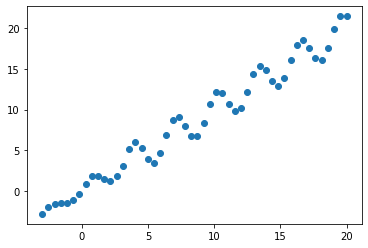

In [3]:
# Обучающая выборка
xleft = -3
xright = 20
n = 50
x = np.linspace(xleft,xright,n)
y = np.zeros ((n))
for i in range(0,n):
    if (x[i]<0) :
        y[i] = 1.0*x[i] + 0.5*np.sin(2*x[i])
    elif (x[i]<np.pi):
        y[i] = 1.0*x[i] + 1.0*np.sin(2*x[i])
    else:
        y[i] = 1.0*x[i] + 2.0*np.sin(2*x[i])
plt.plot (x,y, 'o')


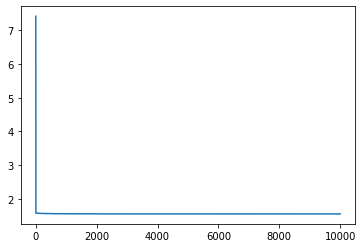

In [4]:
losses = []
net = Reg()
lr = 0.005
for i in range(10000):
    y_p = net.forward(x)
    loss = mse(y, y_p)
    #print(loss)
    dk, db = net.backward(x,y,y_p)
    losses.append(loss)
    net.k -= lr*dk/x.shape[0]
    net.b -= lr*db/x.shape[0]  
plt.plot(losses)   

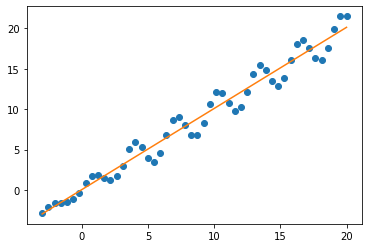

In [5]:
plt.plot (x, y, 'o')
plt.plot (x, y_p)

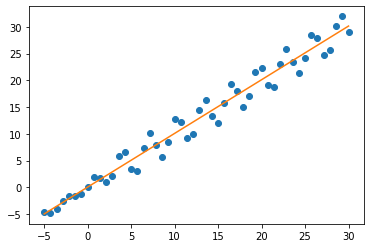

In [8]:
# Тестовая выборка
xleft = -5
xright = 30
n = 50
x = np.linspace(xleft,xright,n)
y = np.zeros ((n))
for i in range(0,n):
    if (x[i]<0) :
        y[i] = 1.0*x[i] + 0.6*np.sin(2*x[i])
    elif (x[i]<np.pi):
        y[i] = 1.0*x[i] + 1.2*np.sin(2*x[i])
    else:
        y[i] = 1.0*x[i] + 3.0*np.sin(2*x[i])
plt.plot (x,y, 'o')
y_p = net.forward(x)
plt.plot (x, y_p)